
# IFT6758 Fall 2019 - Assignment 1

# Part 1 - Data Wrangling and Visualization



## Missing Values

4. Selection bias. Download the IMDB and Rotten Tomatoes
[data](https://gist.githubusercontent.com/krisrs1128/9276aa2a5d9fa7ab0786bbc75f93d77a/raw/1aa5220f9e140515d04601a6c114fc43cecf1e21/movies.csv).

   a. Is there any missingness in this dataset? Which columns have the most missingness?
   
   b. Make a hexbin scatterplot of rotten tomatoes vs. imdb scores against one
   another. Comment on the relationship between these variables.
   
   c. Filter the movies to those made before 1970, and remake the scatterplot.
   What do you notice?
   
   d. Propose explanations for what you see in part (c).


---


Solution
---

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a) There are missingness across the dataset, and amongst them, the column `US_DVD_Sales` have the most

In [0]:
movies = pd.read_csv("https://gist.githubusercontent.com/krisrs1128/9276aa2a5d9fa7ab0786bbc75f93d77a/raw/1aa5220f9e140515d04601a6c114fc43cecf1e21/movies.csv")
df = movies.isna()
df = df.agg('sum')
df
df.idxmax()

'US_DVD_Sales'

b) The plot is shown below:

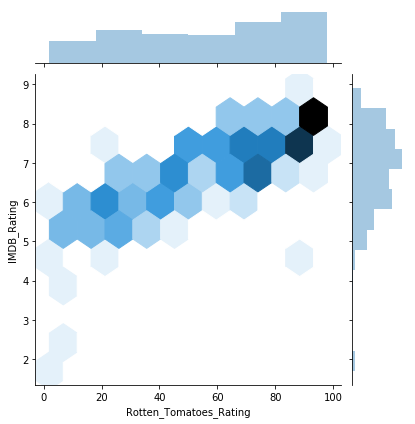

In [0]:
df = movies.dropna()
x = df.Rotten_Tomatoes_Rating
y = df.IMDB_Rating
sns.jointplot(x, y, kind='hex')

Some observations:


> Generally, the two ratings correlate linearly quite well, and that is even more so for some that are highly ranked (notice the darker hexagons at the top-right). This indicates that if a movie is considered 'good', it is considered so for both ratings



> There are a few outliers that scored very highly on Rotten Tomatoes but less so or poorly on IMDB




c) The plot is shown below:

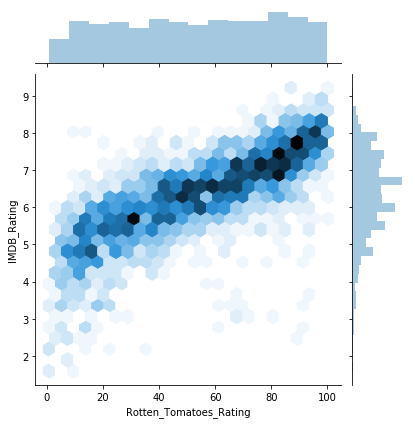

In [0]:
df = movies.astype({'Release_Date':'datetime64'})
# filter movies before 1970
df = df[df.Release_Date >= pd.to_datetime('1970-01-01')]
x = df.Rotten_Tomatoes_Rating
y = df.IMDB_Rating
sns.jointplot(x, y, kind='hex')

We can see that the correlation is still somewhat strong, and across the whole scale there is a clear 'darker' region where the correlation is strong amongst many movies. Compared to the last one, we could say a movie that gets rated higher on Rotten Tomatoes may not get the same score on IMDB. This is shown by the slightly shallower slope of the 'line'

However we see there are a lot of movies far away from the line, and are scattered all over the place, which means they are perceived rather differently on the two platforms.




d) Some possible explanations


> There are far more movies made post-1970 thanks to technologies and funds. This means there are far more points in the dataset for Question b) than that in Question c). The more data points, the more 'representative' a dataset become as it incorporates more combinations of movies.



> The entertainment market gained much more audience, who, with improvement in technologies, have viewed far more movies across a wider range of time (as opposed to pre-70's). They have better understanding of appreciating the movie itself and are more likely to make fair-er and more consistent judgements. That is to say, the 'quality' of ratings provided improved, in addition to the aforementioned jump in 'quantity'



## Tidying


9. You have the following table in a variable called "test_scores",

| Student | Physics | Chemistry | English | Math |
|:--------|:--------|:----------|:--------|:-----|
| John    | 78      | 79        | 56      | 95   |
| Alice   | 58      | 72        | 91      | 81   |
| Rachel  | 22      | 61        | 88      | 64   |
| Tom     | 78      | 89        | 56      | 83   |


(a) Explain the format of the table after running this code,
```
test_scores_clean = pd.melt(
    test_scores,
    id_vars=['Student'],
    var_name=['Subject'],
    value_name='Score'
)
```


(b) Explain what the following code does.

```
test_scores.assign(
    overall=lambda df: df.drop("Student", axis=1).sum(axis=1),
    quant=lambda df: df["Math"] + df["Physics"],
)
```

---


Solution
---



a) This code creates a new table called ```test_scores_clean``` from pivoting the original table. The axis is the column ***Students***. Then for the new column ***Subject***, we are going to fill in labels using the old column names via transpose: ***Physics, Chemistry, English, Math***. This is done by for each of these names as 4-in-a-row, we fill in one subject name for all 4 student names. As the table is filling in the transposed labels, since there are 4 labels, we iteratively fill them in. This new column is the anchor for the last column ***Score***, where since we transposed the old table, and for each *ID* and *anchor variable*, there is exactly one value (score), we only fill in the table based on that number.

We could anticipate the header and first rows of the new table to be:



> Student Subject Score


> John    Physics 78





To examine, we recreate the table using pandas by running the following code, and add the function we are interested in. The implementation is done using ***`Dataframe`***, and we print the transformed table.

In [0]:
import pandas as pd

# table implementation by by filling in columns
test_scores = pd.DataFrame({'Student': {0: 'John', 1: 'Alice', 2: 'Rachel', 3: 'Tom' }, 
                   'Physics': {0: 78, 1: 58, 2: 22, 3: 78}, 
                   'Chemistry': {0: 79, 1: 72, 2: 61, 3: 89},
                   'English': {0: 56, 1: 91, 2: 88, 3: 56},
                   'Math': {0: 95, 1: 81, 2: 64, 3: 83}
                  }) 

# function of interest
test_scores_clean = pd.melt(
    test_scores,
    id_vars=['Student'],
    var_name=['Subject'],
    value_name='Score'
)

# console display
test_scores_clean

,Student,Subject,Score
0,John,Physics,78
1,Alice,Physics,58
2,Rachel,Physics,22
3,Tom,Physics,78
4,John,Chemistry,79
5,Alice,Chemistry,72
6,Rachel,Chemistry,61
7,Tom,Chemistry,89
8,John,English,56
9,Alice,English,91


Observing from the console, the new table confirms our predictions.

---




b) Reading the code, the ***`Dataframe.assign()`*** method being used. We are 'appending' (adding) new columns to a DataFrame(table), returning a new object (a copy) with the new columns added to the original ones. Existing columns that are re-assigned will be overwritten. 

It is notable that the length of newly assigned item must match the number of rows of the table. There are two columns being added: **`overall`** and **`quant`**. Since they do not share the same name with anything existing, they will be appended to the end of the table.




> **`overall`**
The first method, **`DataFrame.drop()`**, removes the dataframe indicated by either the column name or index number. Here we are removing the column named ***'Student'***, whose values(labels) are all character strings of names. **`axis = 1`** tells us to drop the labels from column. The end result would return a data frame of only columns with different subjects as name and scores (integer) as number. This is to achieve the end goal of computing the total score per student, i.e. summation of scores by row, which is **`sum()`** method and the axis set to '1' (per 'row'). In doing so, we shall remove the character string on each row, which is the label on the now-removed 'Student' column. The end result is the algebraic sum of all subjects' scores displayed under the column name ***'overall'***.

Ex. 
First row - John: under the new column 'overall', the value should be 78 + 79 + 56 + 95 = **308**. 

*This method is similar to the concept of 'splice'-ing.

> **`quant`**
The method does a simple computation of summing the labels under 'Math' and 'Physics' columns, returning the algebraic sum under a new column named 'quant'. We access the labels by indicating the corresponding column name directly, and the operation is again done row-wise. Since the two input arguments are integer, the return type is also an integer.

Ex. 
First row - John: under the new column 'quant', the value should be 78 + 95 = **173**. 


We again implement the table with the function we are dealing with and check the results.

In [0]:
import pandas as pd

# table implementation by by filling in columns
test_scores = pd.DataFrame({'Student': {0: 'John', 1: 'Alice', 2: 'Rachel', 3: 'Tom' }, 
                   'Physics': {0: 78, 1: 58, 2: 22, 3: 78}, 
                   'Chemistry': {0: 79, 1: 72, 2: 61, 3: 89},
                   'English': {0: 56, 1: 91, 2: 88, 3: 56},
                   'Math': {0: 95, 1: 81, 2: 64, 3: 83}
                  }) 

# function of interest
test_scores.assign(
    overall=lambda df: df.drop("Student", axis=1).sum(axis=1), # remove the character string (by column) and get row-wise algebraic sum
    quant=lambda df: df["Math"] + df["Physics"], # algebraic sum of labels of 'Math' and 'Physics' columns
)

,Student,Physics,Chemistry,English,Math,overall,quant
0,John,78,79,56,95,308,173
1,Alice,58,72,91,81,302,139
2,Rachel,22,61,88,64,235,86
3,Tom,78,89,56,83,306,161


Observing from the console, the new table confirms our predictions.

---



# Visualization

12. Making a heatmap. Heatmaps are a way of plotting continuous values against
combinations of categorical variables. We'll use them to analyze a gene
expression dataset, collected to study changes in expression after the first
symmetry breaking event of the embryo. The rows of the matrix correspond to
genes, and the columns are different experimental samples.

  a. Make a heatmap of the [raw
data](https://gist.githubusercontent.com/krisrs1128/b8dc85b659186259715f8efe950ffce6/raw/77669ebdda4d6f8a029c2fdf506f4599277b50f4/hiiragi.csv),
using `sns.heatmap`. Make sure to use a diverging color scale, centered around zero.
 
 b. The heatmap is not particularly informative. It's hard to make comparisons
across either genes or samples, since there are so many of them. To remedy this,
order them using a clustering method (the details are unimportant), as
implemented in the `clustermap` function. （can use `clusterdump` directly)

---


Solution
---

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a) The heatmap is shown below

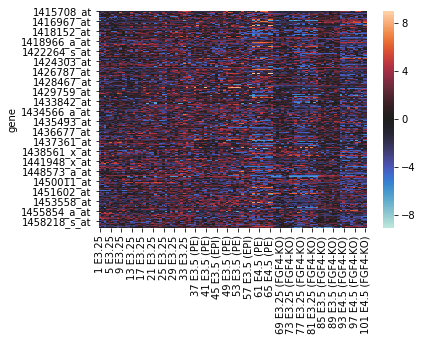

In [0]:
genes = pd.read_csv('https://gist.githubusercontent.com/krisrs1128/b8dc85b659186259715f8efe950ffce6/raw/77669ebdda4d6f8a029c2fdf506f4599277b50f4/hiiragi.csv')
genes = genes.set_index('gene')
sns.heatmap(genes, center=0)

b) The revised heatmap is shown below

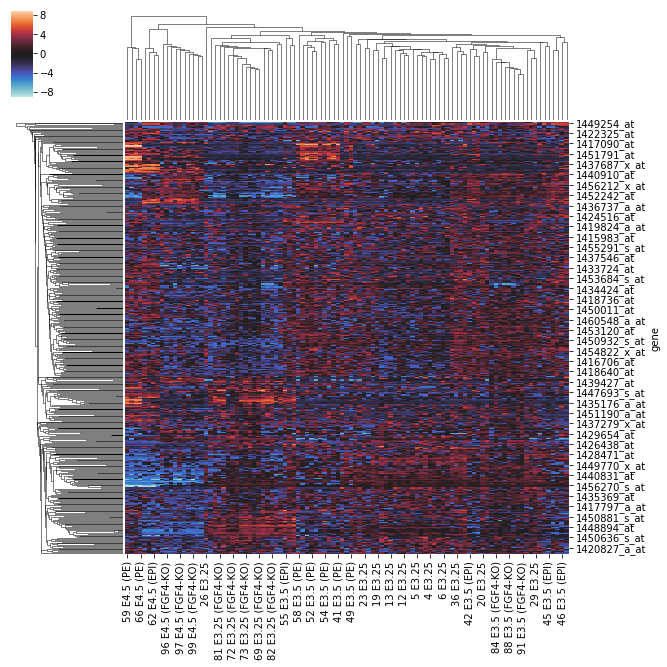

In [0]:
sns.clustermap(genes, center=0)